ANALISIS DE DATOS SOBRE OPINIONES

Importación de datos y librerías:

In [56]:
import csv
import pandas as pd
import numpy as np
import matplotlib as plt
pd.set_option('display.max_colwidth', -1)
Data=pd.read_csv('//Users/irenearabiourrutia/Downloads/doc/tfm1/DataOpi.csv')
import datetime

In [57]:
Data.head()

,Banco,Comentario,Estrellas,Fecha,PorRecomendacion,Producto,Puntuacion,Tipo,Usuario,Votos,Votos2
0,Image of Cetelem,"Nefasta atención , telefónica y via email .\nDepende de quien te atienda vas cambiando las cosas .\nNo entiendo como esta empresas trabaja con Volvo .",1,- hace 7 horas,El 62 % de los usuarios lo recomiendan,Opiniones sobre Cetelem,"3,1",Banco,@Anónimo,NaN,(1842 votos)
1,Image of MyInvestor,"Muy mala experiencia. No cumplen lo que dicen, atención cliente muy mala. Este 1% saldrá mucho más caro al final.",1,- hace 22 horas,La mayoría de los usuarios lo recomiendan,Opiniones sobre Cuenta 1% MyInvestor,"4,2",Cuentas,@Anónimo,NaN,NaN
2,Image of Santander,"dejar la cuenta a cero y si quieren que la cierren, sino que la dejen\nEs una vergüenza",1,- hace 22 horas,Sólo el 55 % de los usuarios lo recomiendan,Opiniones sobre Cuenta Zero,"2,7",Cuentas,@Anónimo,NaN,NaN
3,Image of Lyca Mobile,No lo recomiendo son un problema,1,- hace 22 horas,Sólo el 51 % de los usuarios lo recomiendan,Opiniones sobre Lyca Mobile,"2,6",Telefonia-internet,@Anónimo,NaN,(390 votos)
4,Image of DIGI mobil,"la fibra, por cable muy bien, por wifi mala, lineas de móvil si usas 4g en android bastante fluido, si usas iPhone y LTE paupérrimo, algunas veces pongo 3G para poder cargar la pagina en el navegador. El servicio al cliente te dice que no debería fallar. En fin buscando donde ir con 4 lineas moviles",2,- hace 20 horas,Sólo el 56 % de los usuarios lo recomiendan,Opiniones sobre DIGI mobil,"2,8",Telefonia-internet,@salvador,NaN,(1339 votos)


Gráfico que muestra cuantas opiniones pertenecen a las distintas categorías en el campo Tipo

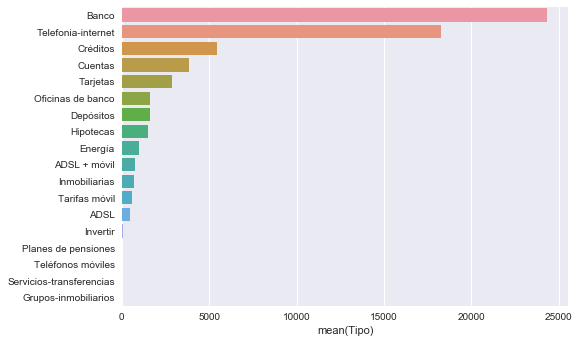

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.barplot(y=Data.Tipo.value_counts().index, x=Data.Tipo.value_counts())
plt.show()

Eliminamos de los datos los datos que no pertenecen a servicios financieros

In [59]:
DataBanca=Data[Data['Tipo']!='Telefonia-internet']
DataBanca=DataBanca[DataBanca['Tipo']!='Tarifas móvil']
DataBanca=DataBanca[DataBanca['Tipo']!='Energía']
DataBanca=DataBanca[DataBanca['Tipo']!='Energía']
DataBanca=DataBanca[DataBanca['Tipo']!='ADSL + móvil']
DataBanca=DataBanca[DataBanca['Tipo']!='ADSL']
DataBanca=DataBanca[DataBanca['Tipo']!='nan']
DataBanca=DataBanca[DataBanca['Tipo']!='Grupos-inmobiliarios']
DataBanca=DataBanca[DataBanca['Tipo']!='Teléfonos móviles']                 
DataBanca=DataBanca[DataBanca['Tipo']!='Inmobiliarias']    

In [60]:
len(DataBanca)

41586

Se eliminan las observaciones que en en el campo Estrellas tengan un 0, ya que estas suelen ser respuestas a las opiniones aportadas por los usuarios

In [61]:
DataBanca=DataBanca[DataBanca['Estrellas']!=0]

In [62]:
len(DataBanca)

39136

Se hacen las modificaciones en los campos:

In [63]:
DataBanca['PorRecomendacion']=DataBanca.PorRecomendacion.str.extract('(\d+)')

/Users/irenearabiourrutia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [64]:
DataBanca['Producto']=DataBanca.Producto.str.replace('Opiniones sobre'," ")

In [65]:
DataBanca['Banco']=DataBanca.Banco.str.replace('Image of'," ")

In [66]:
DataBanca['Votos2']=DataBanca.Votos2.str.extract('(\d+)')

/Users/irenearabiourrutia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [67]:
DataBanca.dtypes

Banco               object 
Comentario          object 
Estrellas           int64  
Fecha               object 
PorRecomendacion    object 
Producto            object 
Puntuacion          object 
Tipo                object 
Usuario             object 
Votos               float64
Votos2              object 
dtype: object

In [68]:
DataBanca['Votos2']=DataBanca['Votos2'].fillna(float(0))
DataBanca['Votos2']=DataBanca['Votos2'].astype(object).astype(float)
DataBanca['Votos']=DataBanca['Votos'].fillna(float(0))
DataBanca['Votos']=DataBanca['Votos']+DataBanca['Votos2']
DataBanca.drop('Votos2', axis=1, inplace=True)
DataBanca['Puntuacion']=DataBanca.Puntuacion.str.replace(',',".")
DataBanca['Puntuacion']=DataBanca['Puntuacion'].fillna(float(0))
DataBanca['Puntuacion']=DataBanca['Puntuacion'].astype(object).astype(float)
DataBanca['Estrellas']=DataBanca['Estrellas'].astype(int).astype(float)
DataBanca['PorRecomendacion']=DataBanca['PorRecomendacion'].astype(object).astype(float)

In [69]:
DataBanca.dtypes

Banco               object 
Comentario          object 
Estrellas           float64
Fecha               object 
PorRecomendacion    float64
Producto            object 
Puntuacion          float64
Tipo                object 
Usuario             object 
Votos               float64
dtype: object

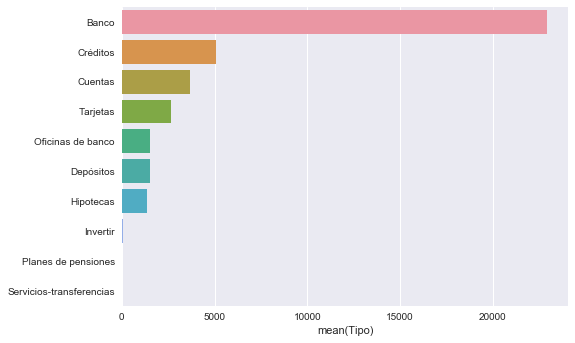

In [70]:
sns.set_style('darkgrid')
sns.barplot(y=DataBanca.Tipo.value_counts().index, x=DataBanca.Tipo.value_counts())
plt.show()

Se crea un campo nuevo llamado Año a partir de la fecha en la que se hizo el comentario

In [71]:
DataBanca.loc[DataBanca['Fecha'].str.contains("semana"),'Año'] = 2020
DataBanca.loc[DataBanca['Fecha'].str.contains("mes"),'Año'] = 2020
DataBanca.loc[DataBanca['Fecha'].str.contains("hora"),'Año'] = 2020
DataBanca.loc[DataBanca['Fecha'].str.contains("día"),'Año'] = 2020
DataBanca.loc[DataBanca['Fecha'].str.contains("segundo"),'Año'] = 2020
DataBanca.loc[DataBanca['Fecha'].str.contains("1 año"),'Año'] = 2019
DataBanca.loc[DataBanca['Fecha'].str.contains("2 año"),'Año'] = 2018
DataBanca.loc[DataBanca['Fecha'].str.contains("3 año"),'Año'] = 2017
DataBanca.loc[DataBanca['Fecha'].str.contains("4 año"),'Año'] = 2016
DataBanca.loc[DataBanca['Fecha'].str.contains("5 año"),'Año'] = 2015
DataBanca.loc[DataBanca['Fecha'].str.contains("6 año"),'Año'] = 2014
DataBanca.loc[DataBanca['Fecha'].str.contains("7 año"),'Año'] = 2013
DataBanca.loc[DataBanca['Fecha'].str.contains("8 año"),'Año'] = 2012
DataBanca.loc[DataBanca['Fecha'].str.contains("9 año"),'Año'] = 2011

Se hace la conversión a csv del dataset modificado para utilizarlo en el análisis en Tableau

In [72]:
DataBanca.to_csv('Databanca2022.csv')

Estos csv que crean a continuacion se han utilizado para trasladarlos a Tableau para la realización de gráficos (Figura 5 en la memoria) y tablas (Figura 8,tabla donde se enseñan las puntuaciones por cada categoría en cada banco).

In [73]:
DataHistograma=DataBanca[DataBanca['Tipo']=='Banco']
DataHistograma=DataHistograma[["Banco", "Puntuacion","Votos"]]

In [74]:
DataHistograma=DataHistograma.drop_duplicates()

In [75]:
len(DataHistograma)

220

In [76]:
DataHistograma.to_csv("datahistograma.csv")

In [77]:
DataPuntuacion=DataBanca[["Banco", "Tipo","Producto","Puntuacion"]]

In [78]:
DataPuntuacion=DataPuntuacion.drop_duplicates()

In [79]:
DataPuntuacion.to_csv("datapuntuacion.csv")

Se importan las librerías que se utilizan para el análisis de texto

In [80]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = set(stopwords.words('spanish'))
palabras=['si',"saludos","gracias"]

Se crea una funcion para que se anulen las tildes, convierta todo el texto a minúnsculas y elimine los stop_words, números y carácteres especiales.

In [81]:
def limpieza(texto):
    texto=texto.replace("í", "i")
    texto=texto.replace("ó", "o")
    texto=texto.replace("á", "a")
    texto=texto.replace("é", "e")
    texto=texto.replace("ú", "u")  
    texto=re.sub(r'[^\w\s]',' ',texto)
    texto=re.sub(r'[0-9]+',' ',texto)
    texto=texto.strip().lower()
    texto=word_tokenize(texto)
    texto= [w for w in texto if not w in stop_words]
    texto= [w for w in texto if not w in palabras]
   
    return  " ".join(texto)


In [82]:
DataBanca['ComentarioLimpio'] = DataBanca.apply(lambda x: limpieza(x['Comentario']), axis=1)

In [83]:
DataBanca.head()

,Banco,Comentario,Estrellas,Fecha,PorRecomendacion,Producto,Puntuacion,Tipo,Usuario,Votos,Año,ComentarioLimpio
0,Cetelem,"Nefasta atención , telefónica y via email .\nDepende de quien te atienda vas cambiando las cosas .\nNo entiendo como esta empresas trabaja con Volvo .",1.0,- hace 7 horas,62.0,Cetelem,3.1,Banco,@Anónimo,1842.0,2020.0,nefasta atencion telefonica via email depende atienda vas cambiando cosas entiendo empresas trabaja volvo
1,MyInvestor,"Muy mala experiencia. No cumplen lo que dicen, atención cliente muy mala. Este 1% saldrá mucho más caro al final.",1.0,- hace 22 horas,NaN,Cuenta 1% MyInvestor,4.2,Cuentas,@Anónimo,0.0,2020.0,mala experiencia cumplen dicen atencion cliente mala saldra mas caro final
2,Santander,"dejar la cuenta a cero y si quieren que la cierren, sino que la dejen\nEs una vergüenza",1.0,- hace 22 horas,55.0,Cuenta Zero,2.7,Cuentas,@Anónimo,0.0,2020.0,dejar cuenta cero quieren cierren sino dejen vergüenza
6,Renault Bank,"Me decidí a abrir una cuenta por tener una de las mejores remuneraciones del mercado, al principio, leer tantas opciones negativas sobre el funcionamiento de la web me echa a un poco atrás, pero finalmente me decidí y desde el móvil, no me llevó más de 5 minutos completar el registro.",5.0,- hace 1 día,56.0,Renault Bank,2.8,Banco,@Anónimo,54.0,2020.0,decidi abrir cuenta tener mejores remuneraciones mercado principio leer tantas opciones negativas funcionamiento web echa atras finalmente decidi movil llevo mas minutos completar registro
7,Santander,"Yo mi opinión es que es vergonzoso que llegues a una oficina y tengas 20 personas delante, con una chica en la caja que la pobre no puede ni respirar y encima estén cerradas la mitad de oficinas. Es vergonzoso llegar a las once menos cuarto y llevar el número 56 y que a las 11 y veinte van por el 46 , vergonzoso",1.0,- hace 1 semana,51.0,Santander,2.5,Banco,@Anónimo,7228.0,2020.0,opinion vergonzoso llegues oficina personas delante chica caja pobre puede respirar encima esten cerradas mitad oficinas vergonzoso llegar once menos cuarto llevar numero veinte van vergonzoso


In [84]:
CorpusBanco=DataBanca['ComentarioLimpio'].tolist()

In [85]:
CorpusBanco=",".join(CorpusBanco)

In [86]:
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

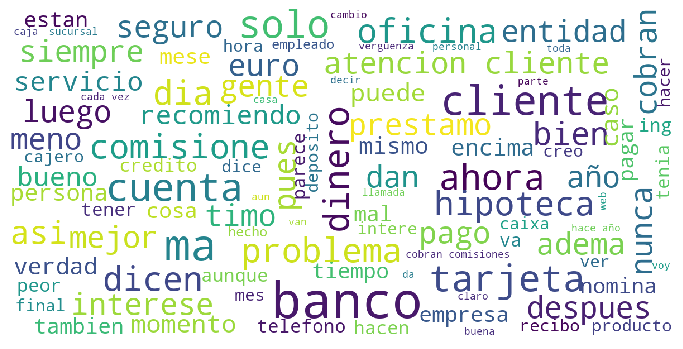

In [87]:
show_wordcloud(CorpusBanco)

En las siguientes líneas se dividen las opiniones sobre la categoría Banco en dos partes. Una parte con comentarios positivos y otra con negativos.

In [88]:
DataBanco=DataBanca[DataBanca['Tipo']=='Banco']

In [89]:
DataBancoNegativo=DataBanco[DataBanco['Estrellas']<3]
DataBancoPositivo=DataBanco[DataBanco['Estrellas']>=3]

In [90]:
len(DataBancoNegativo)

17641

Se define la funcion que calcula los n-gramas mas frecuentes.

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams

In [92]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

In [93]:
get_top_ngram(DataBancoNegativo['ComentarioLimpio'],2)

[('atencion cliente', 927),
 ('cobran comisiones', 475),
 ('cada vez', 436),
 ('peor banco', 400),
 ('hace años', 310),
 ('banco españa', 293),
 ('abrir cuenta', 289),
 ('sacar dinero', 278),
 ('toda vida', 250),
 ('tarjeta credito', 247),
 ('cerrar cuenta', 214),
 ('cancelar cuenta', 212),
 ('comisiones abusivas', 210),
 ('cobran comision', 199),
 ('mantenimiento cuenta', 197),
 ('recomiendo nadie', 195),
 ('despues años', 188),
 ('mas años', 187),
 ('servicio atencion', 186),
 ('llevo años', 185)]

In [94]:
get_top_ngram(DataBancoPositivo['ComentarioLimpio'],2)

[('ningun problema', 213),
 ('atencion cliente', 151),
 ('hace años', 140),
 ('cobran comisiones', 120),
 ('sacar dinero', 103),
 ('llevo años', 102),
 ('buen banco', 97),
 ('mejor banco', 75),
 ('cualquier cajero', 69),
 ('buen trato', 67),
 ('ningun tipo', 67),
 ('codigo promocional', 65),
 ('abrir cuenta', 64),
 ('buena atencion', 63),
 ('cliente hace', 61),
 ('banco mediolanum', 60),
 ('tarjeta credito', 59),
 ('buen servicio', 57),
 ('cuenta corriente', 55),
 ('cuenta nomina', 52)]

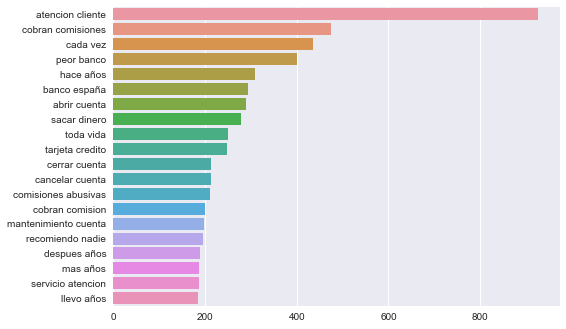

In [95]:
sns.set_style('darkgrid')
top_tri_grams=get_top_ngram(DataBancoNegativo['ComentarioLimpio'],n=2)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)
plt.show()

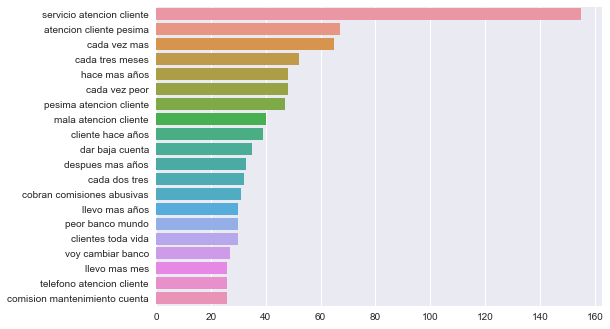

In [96]:
sns.set_style('darkgrid')
top_tri_grams=get_top_ngram(DataBancoNegativo['ComentarioLimpio'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)
plt.show()

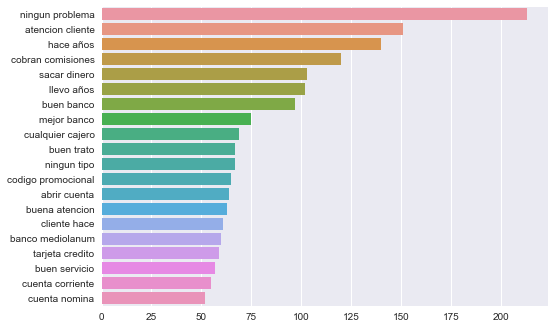

In [97]:
sns.set_style('darkgrid')
top_tri_grams=get_top_ngram(DataBancoPositivo['ComentarioLimpio'],n=2)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)
plt.show()

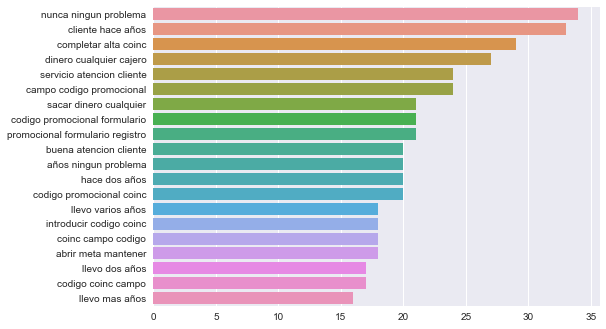

In [98]:
sns.set_style('darkgrid')
top_tri_grams=get_top_ngram(DataBancoPositivo['ComentarioLimpio'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)
plt.show()

CUENTAS

In [101]:
DataCuenta=DataBanca[DataBanca['Tipo']=='Cuentas']

In [102]:
CuentaExpansion=DataCuenta.loc[DataCuenta['Producto'].str.contains('Cuenta Expansión')]

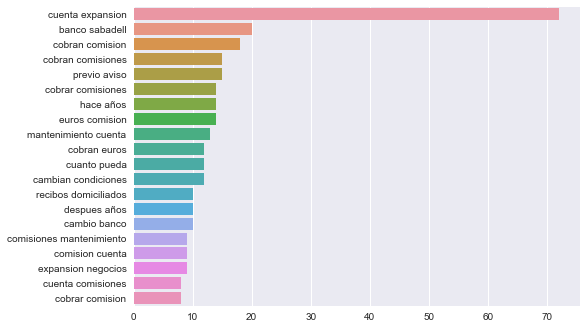

In [103]:
sns.set_style('darkgrid')
top_tri_grams=get_top_ngram(CuentaExpansion['ComentarioLimpio'],n=2)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)
plt.show()